<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab4/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [23]:
!kaggle competitions download -c titanic -p /content/sample_data/lab4;
!unzip /content/sample_data/lab4/titanic.zip -d /content/sample_data/lab4;


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/sample_data/lab4/titanic.zip
replace /content/sample_data/lab4/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
data = pd.read_csv('/content/sample_data/lab4/train.csv')

In [222]:
data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [223]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


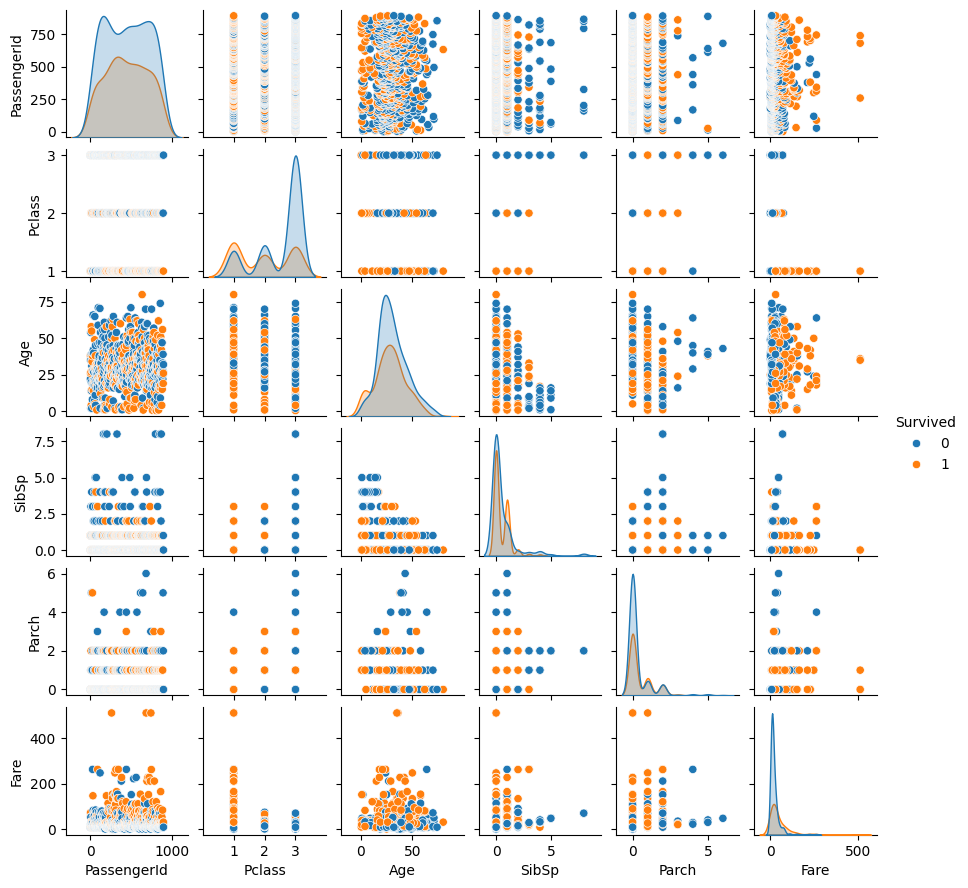

In [64]:
sns.pairplot(data, hue='Survived',height=1.5);
plt.show();

In [245]:
_ = data.drop(columns=["Survived","Name","Sex","Ticket","Cabin","Embarked"]).dropna().corr()
_

PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035349  0.036847 -0.082398 -0.011617  0.009592
Pclass         -0.035349  1.000000 -0.369226  0.067247  0.025683 -0.554182
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.082398  0.067247 -0.308247  1.000000  0.383820  0.138329
Parch          -0.011617  0.025683 -0.189119  0.383820  1.000000  0.205119
Fare            0.009592 -0.554182  0.096067  0.138329  0.205119  1.000000

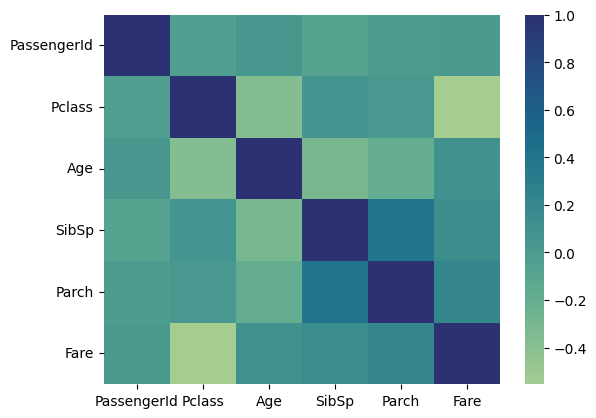

In [246]:
sns.heatmap(_,cmap="crest");

In [214]:
fixed_data = pd.get_dummies(data.drop(columns=["Name","Ticket","Cabin","Embarked"]),columns=['Sex',"Pclass"]).dropna()
fixed_data['Age'].fillna(fixed_data['Age'].median(), inplace=True)

<ipython-input-214-7cf16705a88e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fixed_data['Age'].fillna(fixed_data['Age'].median(), inplace=True)


In [215]:
fixed_data.head()

PassengerId  Survived   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0            1         0  22.0      1      0   7.2500       False      True   
1            2         1  38.0      1      0  71.2833        True     False   
2            3         1  26.0      0      0   7.9250        True     False   
3            4         1  35.0      1      0  53.1000        True     False   
4            5         0  35.0      0      0   8.0500       False      True   

   Pclass_1  Pclass_2  Pclass_3  
0     False     False      True  
1      True     False     False  
2     False     False      True  
3      True     False     False  
4     False     False      True

In [236]:
import pandas as pd
import numpy as np

def remove_outliers_zscore(df, column_name, threshold=3):
    mean_value = df[column_name].mean()
    std_value = df[column_name].std()

    df['z_score'] = (df[column_name] - mean_value) / std_value

    df_filtered = df[np.abs(df['z_score']) < threshold]

    df_filtered = df_filtered.drop(columns=['z_score'])

    return df_filtered

def IQR_outlier_removal(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_filtered

In [234]:
fixed_data = remove_outliers_zscore(df=fixed_data,column_name='Age');

In [237]:
fixed_data = IQR_outlier_removal(df=fixed_data,column_name='Age');

In [238]:
fixed_data.astype(int).to_csv('/content/sample_data/lab4/norm_titanic.csv', index=False)

In [250]:
!kaggle datasets download -d mnassrib/telecom-churn-datasets -p /content/sample_data/lab4;
!unzip /content/sample_data/lab4/telecom-churn-datasets.zip -d /content/sample_data/lab4;


Dataset URL: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets
License(s): copyright-authors
  0% 0.00/99.5k [00:00<?, ?B/s]
100% 99.5k/99.5k [00:00<00:00, 53.5MB/s]
Archive:  /content/sample_data/lab4/telecom-churn-datasets.zip
  inflating: /content/sample_data/lab4/churn-bigml-20.csv  
  inflating: /content/sample_data/lab4/churn-bigml-80.csv  


In [254]:
data = pd.read_csv("/content/sample_data/lab4/churn-bigml-80.csv");

In [255]:
data.head(2)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3                2.7   
1                13.7                 3                3.7   

   Customer service calls  Churn  
0                       1  False  
1                       1  False

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [257]:
data.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

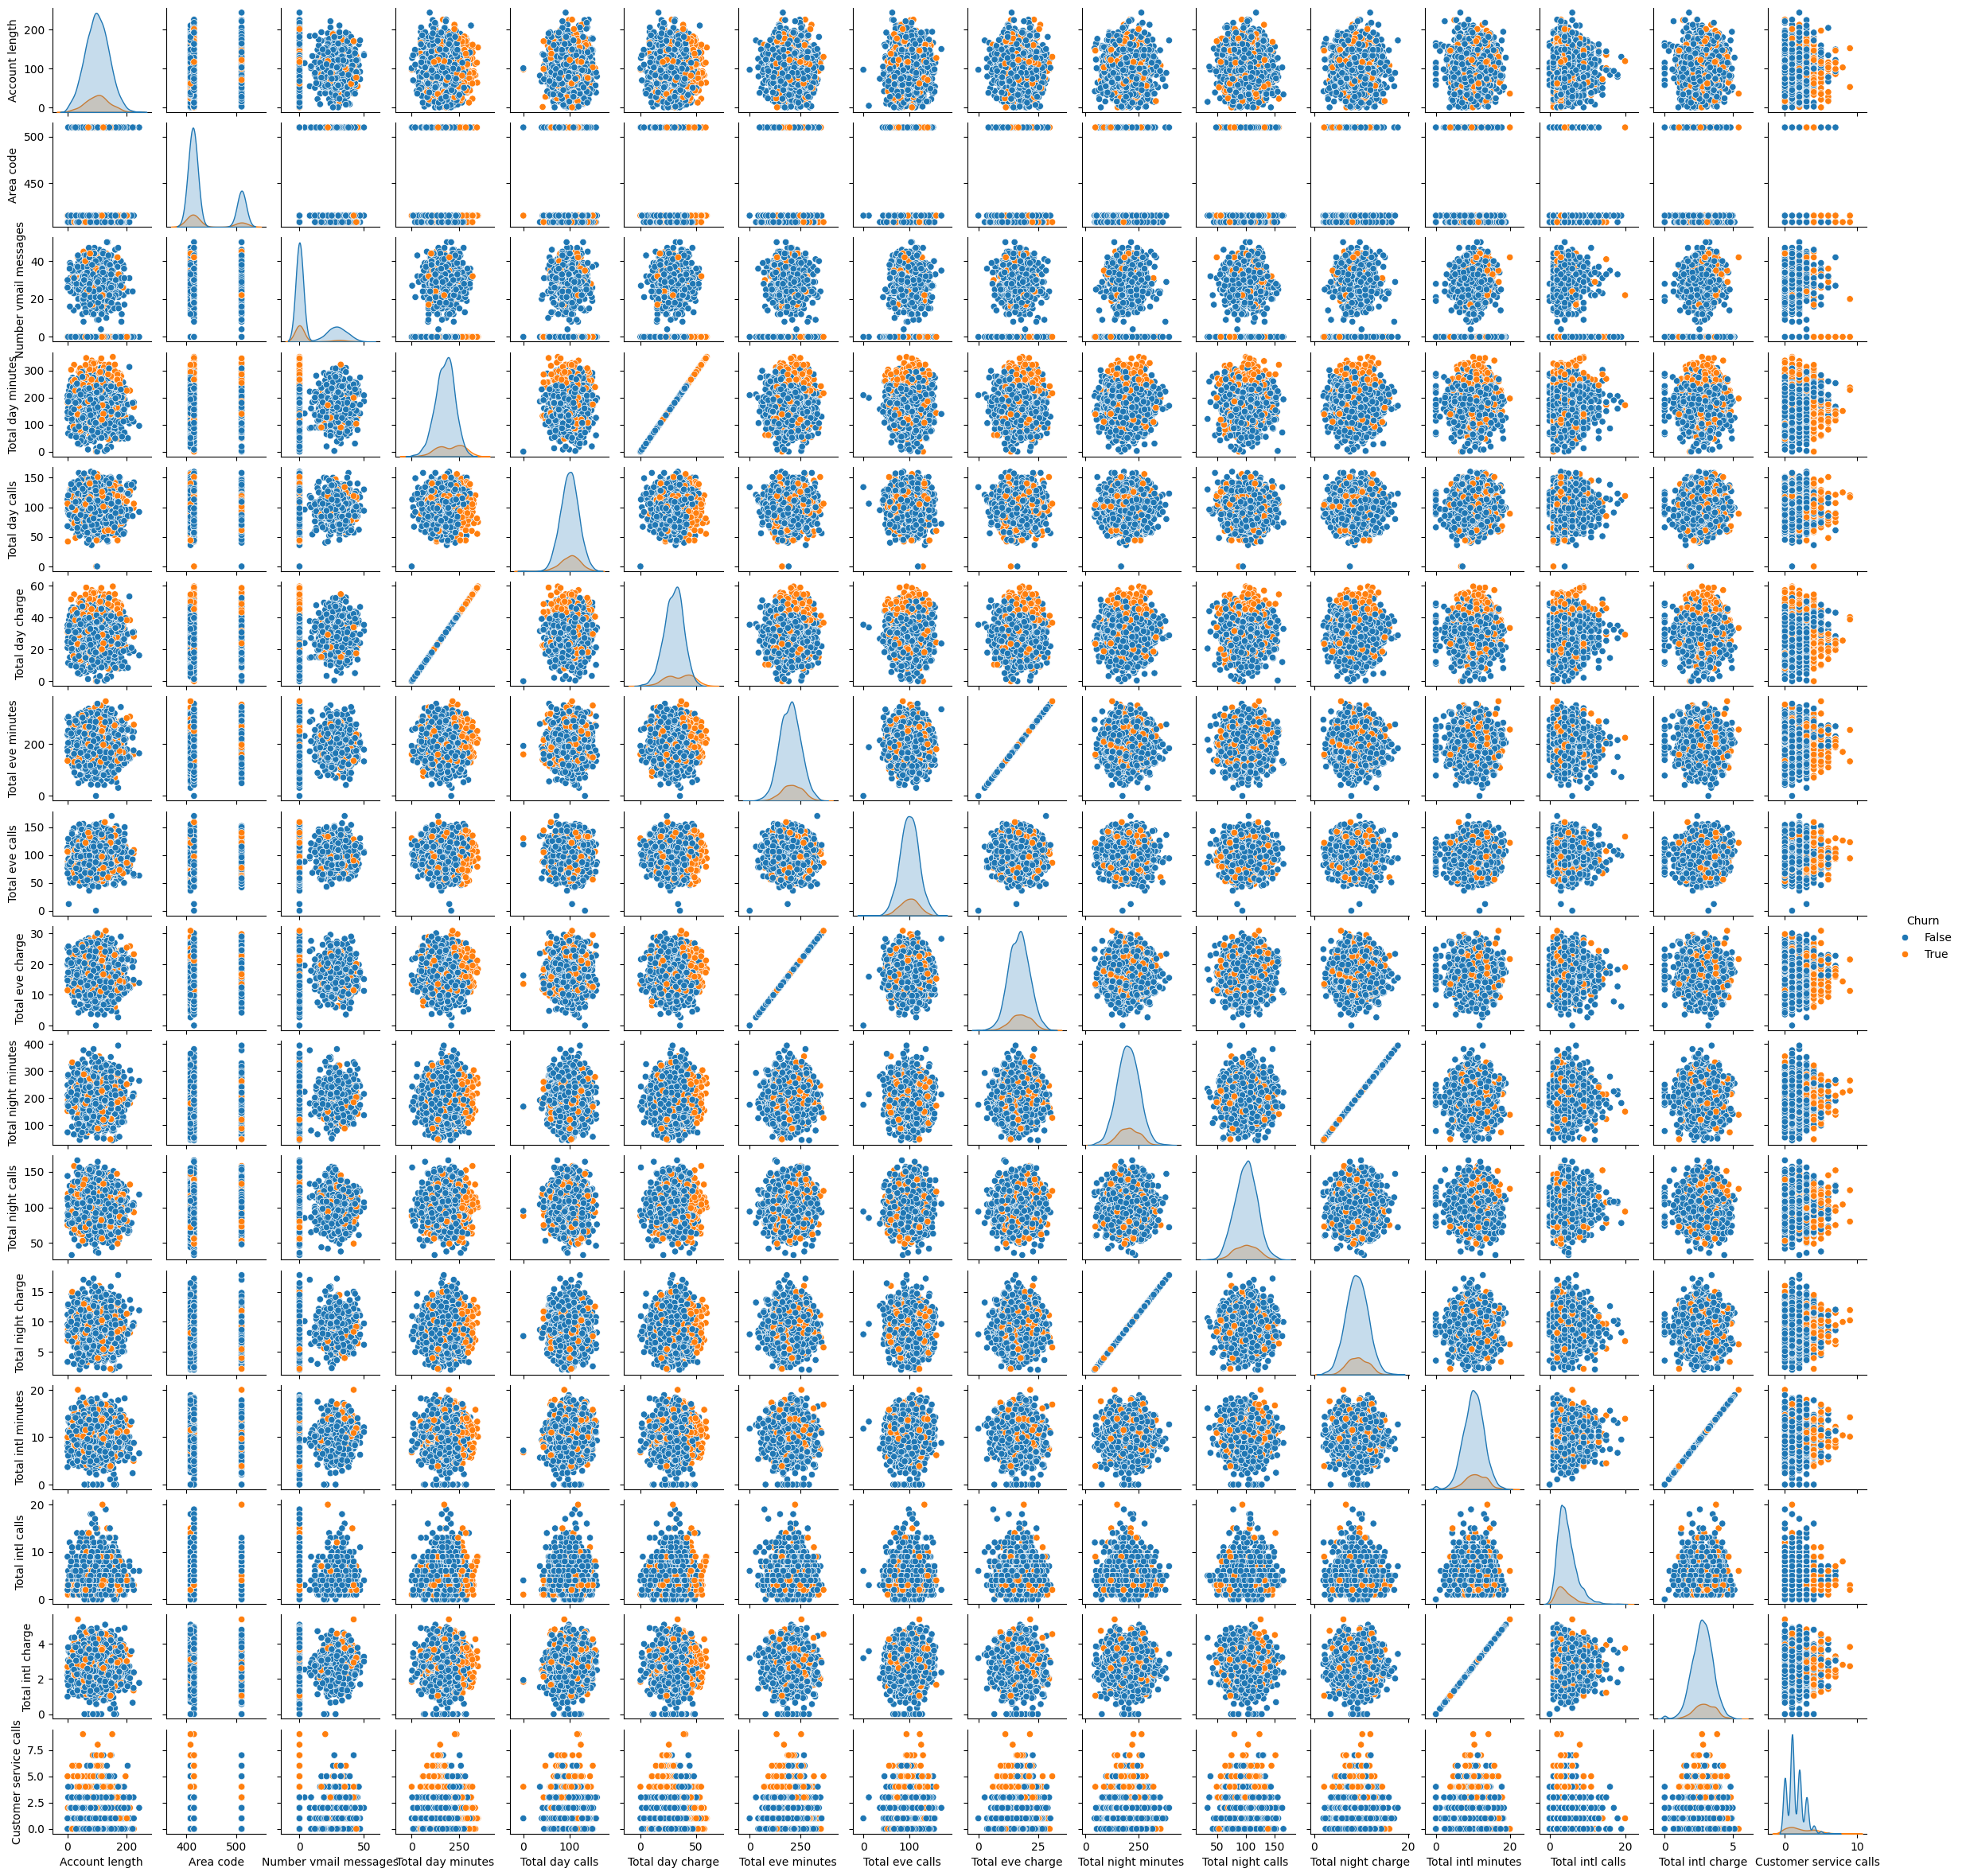

In [260]:
sns.pairplot(data.drop(columns=["State","International plan","Voice mail plan"]), hue='Churn',height=1.5);
plt.show();

In [261]:
_ = data.drop(columns=["State","International plan","Voice mail plan"]).dropna().corr()
_

Account length  Area code  Number vmail messages  \
Account length                1.000000  -0.008620              -0.002996   
Area code                    -0.008620   1.000000              -0.000584   
Number vmail messages        -0.002996  -0.000584               1.000000   
Total day minutes             0.002847  -0.023134               0.019027   
Total day calls               0.038862  -0.009629              -0.009622   
Total day charge              0.002843  -0.023130               0.019027   
Total eve minutes            -0.015923   0.000679               0.011401   
Total eve calls               0.018552  -0.018602               0.005131   
Total eve charge             -0.015909   0.000707               0.011418   
Total night minutes          -0.008994  -0.003353              -0.000224   
Total night calls            -0.024007   0.011455               0.008124   
Total night charge           -0.008999  -0.003382              -0.000229   
Total intl minutes            0.011369  -0.013418              -0.004156   
Total intl calls              0.017627  -0.027423               0.027013   
Total intl charge             0.011383  -0.013534              -0.004136   
Customer service calls        0.002455   0.034442              -0.018787   
Churn                         0.017728   0.001019              -0.086474   

                        Total day minutes  Total day calls  Total day charge  \
Account length                   0.002847         0.038862          0.002843   
Area code                       -0.023134        -0.009629         -0.023130   
Number vmail messages            0.019027        -0.009622          0.019027   
Total day minutes                1.000000         0.016780          1.000000   
Total day calls                  0.016780         1.000000          0.016787   
Total day charge                 1.000000         0.016787          1.000000   
Total eve minutes                0.003999        -0.026003          0.004008   
Total eve calls                  0.009059         0.006473          0.009056   
Total eve charge                 0.003992        -0.026006          0.004002   
Total night minutes              0.013491         0.008986          0.013495   
Total night calls                0.015054        -0.016776          0.015057   
Total night charge               0.013464         0.008972          0.013468   
Total intl minutes              -0.011042         0.031036         -0.011046   
Total intl calls                 0.005687         0.006928          0.005688   
Total intl charge               -0.010934         0.031133         -0.010938   
Customer service calls          -0.024543        -0.011945         -0.024548   
Churn                            0.195688         0.018290          0.195689   

                        Total eve minutes  Total eve calls  Total eve charge  \
Account length                  -0.015923         0.018552         -0.015909   
Area code                        0.000679        -0.018602          0.000707   
Number vmail messages            0.011401         0.005131          0.011418   
Total day minutes                0.003999         0.009059          0.003992   
Total day calls                 -0.026003         0.006473         -0.026006   
Total day charge                 0.004008         0.009056          0.004002   
Total eve minutes                1.000000        -0.007654          1.000000   
Total eve calls                 -0.007654         1.000000         -0.007642   
Total eve charge                 1.000000        -0.007642          1.000000   
Total night minutes             -0.013414        -0.000175         -0.013428   
Total night calls                0.009017         0.000797          0.009030   
Total night charge              -0.013450        -0.000135         -0.013464   
Total intl minutes              -0.006915         0.011012         -0.006923   
Total intl calls                 0.002160         0.003710          0.002169   
Total intl cha

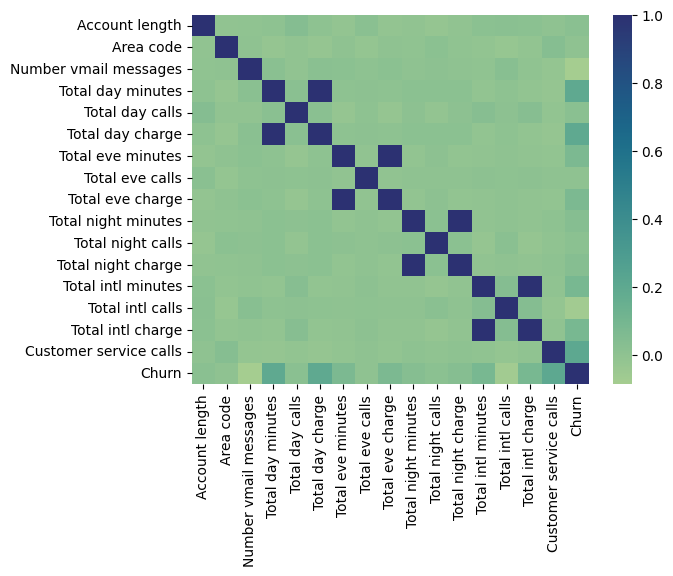

In [262]:
sns.heatmap(_,cmap="crest");

In [96]:
#Задание 2
import re

In [126]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p /content/sample_data/lab4;
!unzip /content/sample_data/lab4/imdb-dataset-of-50k-movie-reviews.zip -d /content/sample_data/lab4;


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/sample_data/lab4/imdb-dataset-of-50k-movie-reviews.zip
  inflating: /content/sample_data/lab4/IMDB Dataset.csv  


In [140]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [152]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)


text = "I running love programming in Python, and I enjoy solving coding challenges!"

processed_text = preprocess_text(text)
print(processed_text)


run love program python enjoy solv code challeng


In [150]:
data = pd.read_csv('/content/sample_data/lab4/IMDB Dataset.csv')

In [175]:
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [176]:
data["review"] = data["review"].apply(preprocess_text)

In [178]:
data.to_csv('/content/sample_data/lab4/norm_imdb.csv', index=False)

In [180]:
#3
import numpy as np

In [179]:
data = pd.read_csv('/content/sample_data/lab4/norm_imdb.csv')

In [185]:
y = np.array([x == "positive" for x in data['sentiment']]).astype(int)

In [186]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [196]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["review"].values)

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_train, y_train)


print(accuracy_score(y_train, inner_model.predict(X_train)))
print(accuracy_score(y_test, inner_model.predict(X_test)))

0.9971714285714286
0.8788
